<a href="https://colab.research.google.com/github/rubyvanrooyen/observation_planning/blob/main/callisto/Jupiter_orbit_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display
from ipywidgets import interact, widgets
from datetime import datetime, timedelta

import ephem
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Date of observation
Enter observation date: CCYY-MM-DD

In [ ]:
text_layout = {'width':'70px'}

year_lb = widgets.Text(value='Year', disabled=True, layout=text_layout)
mnth_lb = widgets.Text(value='Month', disabled=True, layout=text_layout)
day_lb = widgets.Text(value='Day', disabled=True, layout=text_layout)
labels = widgets.HBox([year_lb, mnth_lb, day_lb])

year = widgets.Text(value='2021', placeholder='CCYY', disabled=False, layout=text_layout)
mnth = widgets.Text(value='01', placeholder='MM', disabled=False, layout=text_layout)
day = widgets.Text(value='01', placeholder='DD', disabled=False, layout=text_layout)
date = widgets.HBox([year, mnth, day])

ui = widgets.VBox([labels, date])
display(ui)

In [ ]:
date_str = '{}/{:02d}/{:02d}'.format(year.value, int(mnth.value), int(day.value))
today = datetime.strptime(date_str, '%Y/%m/%d')

## Telescope location
MeerKAT array reference position set by default 


In [ ]:
text_layout = {'width':'100px'}

lat_lb = widgets.Text(value='Latitude', disabled=True, layout=text_layout)
lon_lb = widgets.Text(value='Longitude', disabled=True, layout=text_layout)
alt_lb = widgets.Text(value='Elevation [m]', disabled=True, layout=text_layout)
hrz_lb = widgets.Text(value='Horizon [deg]', disabled=True, layout=text_layout)
labels = widgets.HBox([lat_lb, lon_lb, alt_lb, hrz_lb])

lat = widgets.Text(value='-30:42:39.8', placeholder='latitude', disabled=False, layout=text_layout)
lon = widgets.Text(value='21:26:38.0', placeholder='longitude', disabled=False, layout=text_layout)
alt = widgets.Text(value='1086.6', placeholder='elevation', disabled=False, layout=text_layout)
hrz = widgets.Text(value='20.0', placeholder='horizon', disabled=False, layout=text_layout)
date = widgets.HBox([lat, lon, alt, hrz])

ui = widgets.VBox([labels, date])
display(ui)

In [ ]:
MKT = ephem.Observer()
MKT.lat = lat.value
MKT.lon = lon.value
MKT.elevation = float(alt.value)
MKT.horizon = ephem.degrees(hrz.value)
MKT.epoch = ephem.J2000
MKT.date = ephem.Date(today)

## Solar bodies of interest

In [ ]:
jupiter = ephem.Jupiter(MKT)
sun = ephem.Sun(MKT)
moon = ephem.Moon(MKT)

## Orbit calculations

### Jupiter orbits the Sun every 12 years

In [ ]:
# restore object date
MKT.date = ephem.Date(today)

In [ ]:
# solar distance calculation
orbit = 12  # years
date_range = []
jupiter_sun_distance = []  # Distance to Sun (AU)
for days in range(orbit*365):
    date_range.append(ephem.Date(MKT.date).datetime())
    jupiter.compute(MKT)
    jupiter_sun_distance.append(jupiter.sun_distance)
    MKT.date += 1

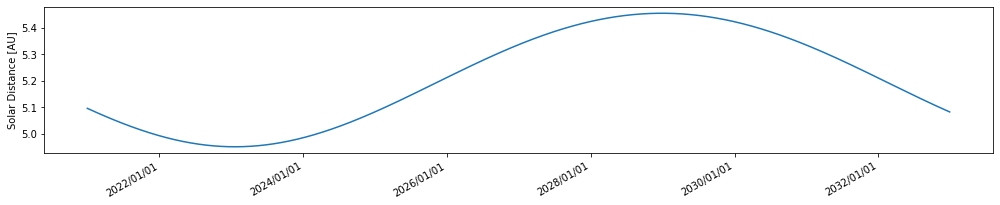

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,
                       figsize=(17, 3),
                       facecolor='white')
ax.plot(date_range, jupiter_sun_distance)
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%Y/%m/%d')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('Solar Distance [AU]', fontsize=10)
plt.show()

### Apparent Earth distance calculation

In [ ]:
# restore object date
MKT.date = ephem.Date(today)

In [ ]:
date_range = []
jupiter_earth_distance = []  # Earth distance is in AU
for days in range(366):
    date_range.append(ephem.Date(MKT.date).datetime())
    jupiter.compute(MKT)
    jupiter_earth_distance.append(jupiter.earth_distance)
    MKT.date += 1

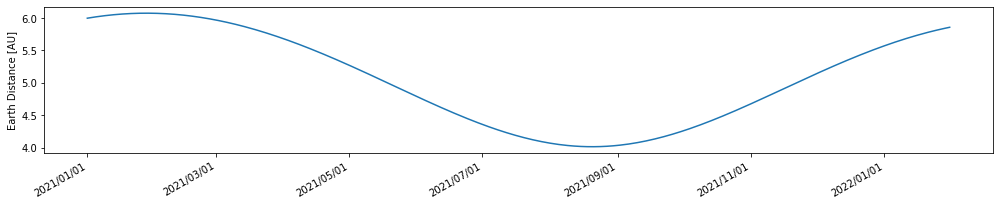

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,
                       figsize=(17, 3),
                       facecolor='white')
ax.plot(date_range, jupiter_earth_distance)
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%Y/%m/%d')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('Earth Distance [AU]', fontsize=10)
plt.show()

### Apparent Lunar and Solar separation angles

In [ ]:
# restore object date
MKT.date = ephem.Date(today)

In [ ]:
date_range = []
jupiter_solar_separation = []
jupiter_lunar_separation = []
for days in range(366):
    date_range.append(ephem.Date(MKT.date).datetime())
    jupiter.compute(MKT)
    sun.compute(MKT)
    moon.compute(MKT)
    jupiter_solar_separation.append(np.degrees(ephem.separation(jupiter, sun)))
    jupiter_lunar_separation.append(np.degrees(ephem.separation(jupiter, moon)))
    MKT.date += 1

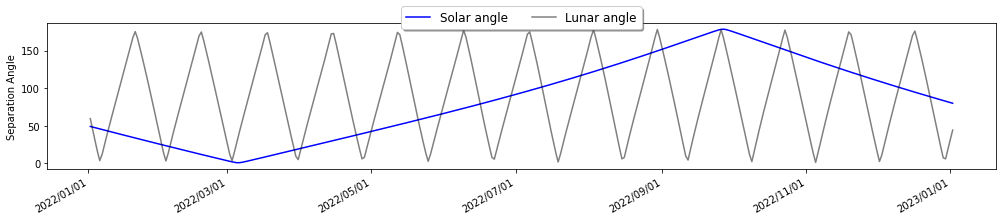

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,
                       figsize=(17, 3),
                       facecolor='white')
ax.plot(date_range, jupiter_solar_separation, 'b', label='Solar angle')
ax.plot(date_range, jupiter_lunar_separation, 'k', alpha=0.5, label='Lunar angle')
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%Y/%m/%d')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('Separation Angle', fontsize=10)

ax.legend(ncol=2,
          loc='upper center',
          bbox_to_anchor=(0.5, 1.15),
          numpoints=1,
          fancybox=True,
          shadow=True,
          fontsize=12)

plt.show()